In [164]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
DATA_DIR = 'C:/Users/Ellie/Desktop/Avi/Parnasa/case_study/split_data_file'
DATA_FILE = None
COLS = ['age','job','marital','education','default','housing','loan','contact','month','day_of_week',
'duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx',
'euribor3m','nr.employed','y']
NUM_COLS = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
'euribor3m','nr.employed']
CAT_COLS = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

In [166]:
# functions for loading and formatting the data

def load_data(data_dir, data_file) -> pd.DataFrame:
    """
    loads data from data file
    :param logger:
    :param data_dir:
    :param data_file:
    :return: pandas dataframe
    """
    print('Loading data from file(s)')
    try:
        if data_file is not None:
            print(f'Data path: {os.path.join(data_dir, data_file)}')
            data_path = os.path.join(data_dir, data_file)
            df = pd.read_csv(data_path)

        else:
            print(f'Data path: {data_dir}')
            files = os.listdir(data_dir)
            df_list = []
            for file in files:
                file_path = os.path.join(data_dir, file)
                temp_df = pd.read_csv(file_path, header=None, index_col=None, delimiter=';', quoting=3)
                df_list.append(temp_df)
            df = pd.concat(df_list, ignore_index=True)
        
        print(f'Data shape: {df.shape}')

        return df
    
    except Exception as e:
        print(f'Loading data from file(s): FAILED. {e}')


def clean_and_format_data(a_df: pd.DataFrame, num_cols) -> pd.DataFrame:
    """
    transformations that make the data suitable for feature engineering and preprocessing
    :param a_df:
    :param num_cols:
    :param logger:
    :return:
    """
    # removing quotation marks from string columns and column index
    print('Cleaning and formatting data')
    try:
        print('Removing quotation marks from column names')
        a_df.iloc[0, :] = a_df.iloc[0, :].str.replace(r'"', '')
        print('Setting column names')
        a_df.columns = a_df.iloc[0, :]
        print('Removing first row containing column names')
        a_df = a_df.iloc[1:, :].copy()
        print('Converting to string type')
        a_df = a_df.apply(lambda s: s.astype(str).str.replace(r'"', ''))
        print('Converting numeric columns to numeric type')
        a_df = a_df.apply(lambda s: s.astype(np.float64) if s.name in NUM_COLS else s)
        print('Dropping duplicates')
        a_df.drop_duplicates(inplace=True)
    except Exception as e:
        print(f'Cleaning and formatting data: FAILED. {e}')

    return a_df

In [167]:
# calling data loading functions

print('Running ETL...')

df = pd.DataFrame()

try:
    data_dir = DATA_DIR
    data_file = DATA_FILE
    df = load_data(data_dir, data_file)

    df = clean_and_format_data(df, NUM_COLS)

    df = add_features(df)

    print('Running ETL: SUCCESS.')
except Exception as e:
    print('Running ETL: FAILED.')

Running ETL...
Loading data from file(s)
Data path: C:/Users/Ellie/Desktop/Avi/Parnasa/case_study/split_data_file
Data shape: (41189, 21)
Cleaning and formatting data
Removing quotation marks from column names
Setting column names
Removing first row containing column names
Converting to string type
Converting numeric columns to numeric type
Dropping duplicates
Creating engineered features
Creating feature - age_range
Creating feature - age_range: FAILED. Transform function failed
Running ETL: SUCCESS.


In [168]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [175]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [169]:
def df_stats(a_df):
    stat_df = a_df.agg(['dtype',
                        'nunique', 
                        lambda x: x.isna().sum(), 
                        lambda x: (x=='unknown').sum(), 
                        lambda x: f'{x.quantile(0.025)}-{x.quantile(0.975)}' if isinstance(x.iloc[0], float) else None,
                        lambda x: x.value_counts().idxmax(),
                        lambda x: f'{x.value_counts(normalize=True).min():.3f}-{x.value_counts(normalize=True).max():.3f}']).T
    stat_df.columns = ['dtype', 'nunique', 'nulls', 'unknown', '%95_value_range', 'mode', 'frequency_range']
    return stat_df

In [170]:
df_stats(df)

,dtype,nunique,nulls,unknown,%95_value_range,mode,frequency_range
0,,,,,,,
age,float64,78,0,0,24.0-60.0,31.0,0.000-0.047
job,object,12,0,330,None,admin.,0.008-0.253
marital,object,4,0,80,None,married,0.002-0.605
education,object,8,0,1730,None,university.degree,0.000-0.295
default,object,3,0,8596,None,no,0.000-0.791
housing,object,3,0,990,None,yes,0.024-0.524
loan,object,3,0,990,None,no,0.024-0.824
contact,object,2,0,0,None,cellular,0.365-0.635
month,object,10,0,0,None,may,0.004-0.334


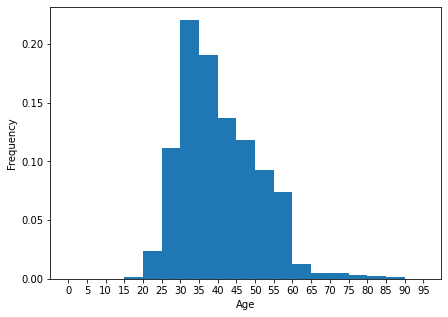

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

df['age'].hist(ax=ax, figsize=(7, 5), bins=np.arange(0,100,5), grid=False, weights = np.ones_like(df.index) / len(df.index));
ax.set_xticks(np.arange(0,100,5));
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()

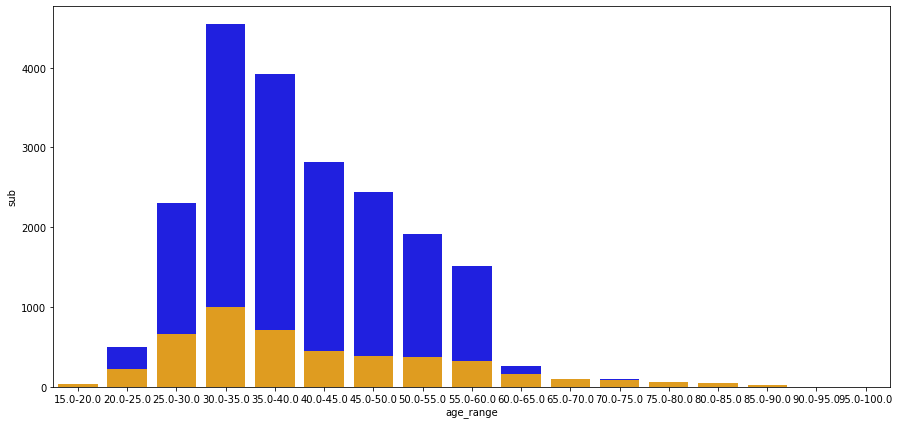

In [172]:
# which age group is most likely to subscribe a deposit?

bw = 5

df['age_range'] = df['age'].transform(lambda x: f'{bw*(x//bw)}-{bw*(x//bw+1)}')

age_stats = pd.DataFrame(df.groupby('age_range')['y'].value_counts())
age_stats.columns = ['sub']
age_stats.reset_index(drop=False, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(15,7));
bar1 = sns.barplot(data = age_stats, x='age_range', y='sub', ax=ax, color='b',  ci=None)
bar2 = sns.barplot(data = age_stats[age_stats['y']=='yes'], x='age_range', y='sub', ax=ax, 
                   estimator=sum, ci=None, color='orange')

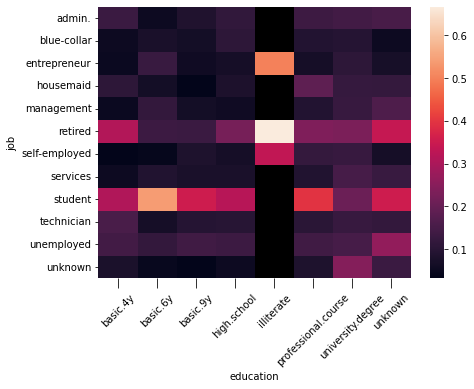

In [173]:
# looking at correlations between job and education
test = pd.DataFrame(df.groupby(['job', 'education'])['y'].value_counts(normalize=True))
test.columns = ['perc']
test.reset_index(drop=False, inplace=True)
test = test[test['y']=='yes']
job_edu_cross = pd.crosstab(test['job'], test['education'], values=test['perc'], aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(7,5))
hm = sns.heatmap(job_edu_cross, ax=ax)
hm.set_facecolor('black')
ax.tick_params(axis='x', labelrotation=45, size=10)

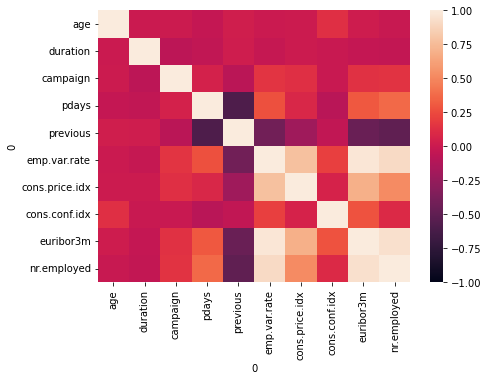

In [174]:
# generating a correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(7,5))
hm = sns.heatmap(df.corr(), ax=ax, vmin=-1, vmax=1)